<a href="https://colab.research.google.com/github/xtevensab007/Inteligenncia-Artificial/blob/main/exploracion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# Carga de datos
data = pd.read_csv('train.csv')



# Columnas del archivo "train.csv"


In [2]:
# nombres de las columnas
column_names = data.columns

print(column_names)


Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')


In [3]:
# información general sobre los datos
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

# Visualización de algunas columnas


## Generos

In [4]:
# columna "genres"
first_5_genres = data['genres'].head(10)
print(first_5_genres)


0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
5    [{'id': 16, 'name': 'Animation'}, {'id': 12, '...
6    [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
7                  [{'id': 99, 'name': 'Documentary'}]
8    [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
9    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...
Name: genres, dtype: object


## Visualización de generos vs valor recaudado

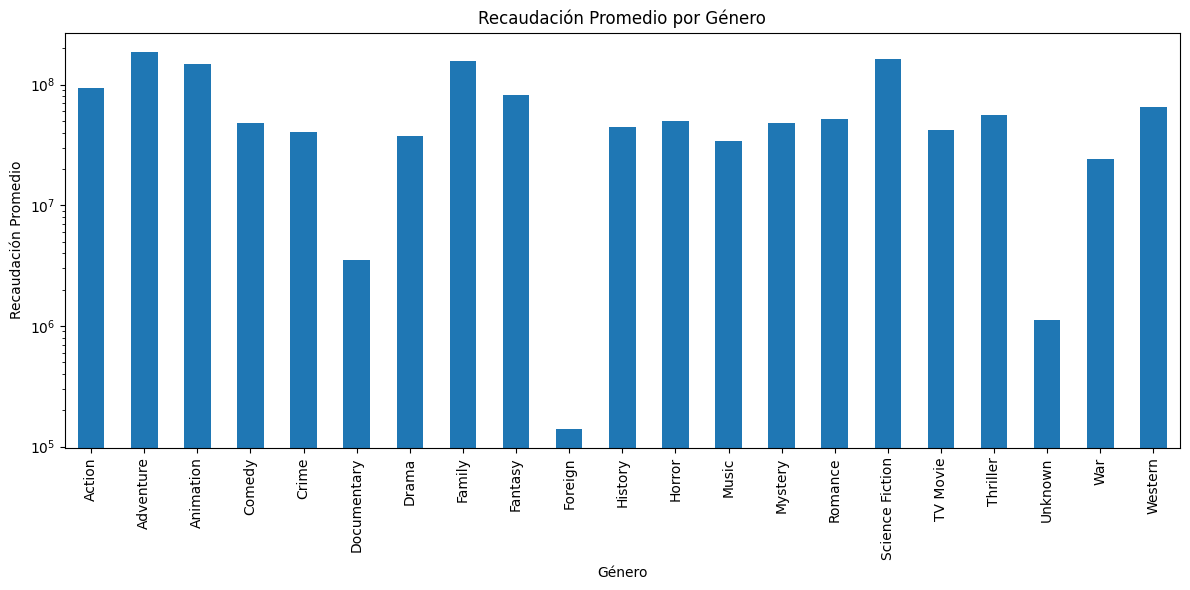

In [5]:
# listas vacías
genres_list = []
revenue_list = []

# Recorrer 'genres'
for genre_data in data['genres']:
    # extraer los nombres de género
    def extract_genre_name(genre_data):
        try:
            genre_dict = eval(genre_data)  # Evaluar la cadena como un diccionario
            genre_name = genre_dict[0]['name']  # Extraer el nombre del género
            return genre_name
        except:
            return None

    genre_name = extract_genre_name(genre_data)
    if genre_name is not None:
        genres_list.append(genre_name)
    else:
        genres_list.append('Unknown') # en caso de no poder extraer el genero

# Llenar la lista de recaudaciones
revenue_list = data['revenue']

# Crear un DataFrame con géneros y recaudaciones
genre_revenue_df = pd.DataFrame({'Genre': genres_list, 'Revenue': revenue_list})

# Calcular el promedio de recaudación por género
average_revenue_by_genre = genre_revenue_df.groupby('Genre')['Revenue'].mean()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
average_revenue_by_genre.plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Recaudación Promedio')
plt.title('Recaudación Promedio por Género')
plt.yscale('log')  # Escala logarítmica para la recaudación
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

## Presupuesto

In [6]:
# columna "budget"
first_5_budget = data['budget'].head(10)
print(first_5_budget)


0    14000000
1    40000000
2     3300000
3     1200000
4           0
5     8000000
6    14000000
7           0
8           0
9     6000000
Name: budget, dtype: int64


nota: Como se puede observar, la columna presupuesto NO esta completa, imaginamos que no es la unica con este problema (LIMPIEZA DE DATOS)

## Visualización de presupuesto vs dinero recaudado

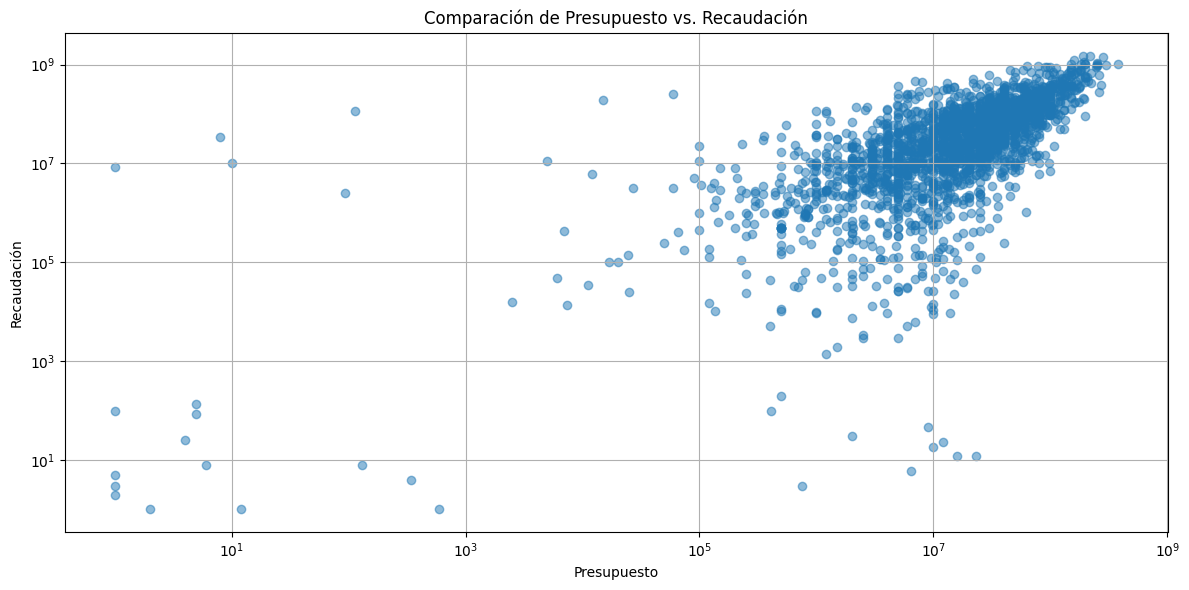

In [7]:
# Seleccion de columnas
budget_revenue_data = data[['budget', 'revenue']]

# Crear un grafico
plt.figure(figsize=(12, 6))
plt.scatter(budget_revenue_data['budget'], budget_revenue_data['revenue'], alpha=0.5)
plt.xlabel('Presupuesto')
plt.ylabel('Recaudación')
plt.title('Comparación de Presupuesto vs. Recaudación')
plt.xscale('log')  # Escala logarítmica para el presupuesto
plt.yscale('log')  # Escala logarítmica para la recaudación
plt.grid(True)
plt.tight_layout()

plt.show()

##Popularidad

In [8]:
# columna "popularity"
first_5_popularity = data['popularity'].head(10)
print(first_5_popularity)

0     6.575393
1     8.248895
2    64.299990
3     3.174936
4     1.148070
5     0.743274
6     7.286477
7     1.949044
8     6.902423
9     4.672036
Name: popularity, dtype: float64
